In [6]:
from sympy import init_printing, Matrix, symbols, cos, sin ,sqrt, pi, I
init_printing()
from opg33 import create_matrix
import numpy as np
import os

In [7]:
B = Matrix([[1,2,-3],[4,5,6],[7,8,9]])
B, B.T, B*B.T

⎛⎡1  2  -3⎤  ⎡1   4  7⎤  ⎡14  -4   -4 ⎤⎞
⎜⎢        ⎥  ⎢        ⎥  ⎢            ⎥⎟
⎜⎢4  5  6 ⎥, ⎢2   5  8⎥, ⎢-4  77   122⎥⎟
⎜⎢        ⎥  ⎢        ⎥  ⎢            ⎥⎟
⎝⎣7  8  9 ⎦  ⎣-3  6  9⎦  ⎣-4  122  194⎦⎠

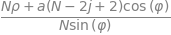

In [8]:
rho, phi, i, j, a, N = symbols('rho varphi i j a N')
xlwr = 2*a*(j-1)/N -a
xupr = 2*a*j/N - a
ylwr = 2*a*(i-1)/N - a
yupr = 2*a*i/N - a
expr = (rho - xlwr * cos(phi))/sin(phi)
expr.simplify()

In [9]:
## TESTDATA
a, N = 1, 10
rho ,phi = np.zeros(N),np.zeros(N)
for i in range(N):
    rho[i] = sqrt(2)*a*i/N-sqrt(2)*a/2
    phi[i] = i*pi/N
rho, phi
rho, phi = np.array(rho), np.array(phi)
A = create_matrix(a,N,rho,phi)

for i, row in enumerate(A):
    for j, element in enumerate(row):
        A[i,j] = np.round(element,8)
print(rho,phi)
A = Matrix(A)
A.T

[-0.70710678 -0.56568542 -0.42426407 -0.28284271 -0.14142136  0.
  0.14142136  0.28284271  0.42426407  0.56568542] [0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339]


c:\Users\pvest\Desktop\DTU\2. Semester\Mathematics 1B\tomografi\Tomografi_mat1b\opg33.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  lower_x_vert = (rho-(2*a*(j-1)/N-a)*cos(phi))/sin(phi)
c:\Users\pvest\Desktop\DTU\2. Semester\Mathematics 1B\tomografi\Tomografi_mat1b\opg33.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  upper_x_vert = (rho-(2*a*j/N-a)*cos(phi))/sin(phi)
c:\Users\pvest\Desktop\DTU\2. Semester\Mathematics 1B\tomografi\Tomografi_mat1b\opg33.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  lower_x_vert = (rho-(2*a*(j-1)/N-a)*cos(phi))/sin(phi)
c:\Users\pvest\Desktop\DTU\2. Semester\Mathematics 1B\tomografi\Tomografi_mat1b\opg33.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  upper_x_vert = (rho-(2*a*j/N-a)*cos(phi))/sin(phi)


⎡ 0       0           0           0           0        0       0           0  
⎢                                                                             
⎢0.2      0           0           0           0        0       0           0  
⎢                                                                             
⎢ 0       0           0           0           0        0       0           0  
⎢                                                                             
⎢ 0   0.21029244      0           0           0        0       0           0  
⎢                                                                             
⎢ 0       0           0           0           0        0       0           0  
⎢                                                                             
⎢ 0       0       0.24360122      0           0        0       0           0  
⎢                                                                             
⎢ 0       0       0.00361237      0           0     

In [18]:
# I = Matrix(np.eye(len(A)))
import pickle
ATA = A.T*A
eigens = list(ATA.eigenvals().keys())
with open('eigs.txt','w') as f:
    for eig in eigens:
        f.write(str(eig)+'\n')
with open('eigs_pickle.pkl','wb') as f:
    pickle.dump(eigens,f)

real_eigens = [eig for eig in eigens if eig.is_real]
with open('real_eigs.txt','w') as f:
    for eig in real_eigens:
        f.write(str(eig)+'\n')
with open('real_eigs_pickle.pkl','wb') as f:
    pickle.dump(real_eigens,f)

Creating eye
10000 (100, 100)
done
multipliying
done
Creating modified ATA
Done
